In [1]:
import pandas as pd

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df=pd.read_excel("file.xlsx")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           52955 non-null  int64         
 1   CustomerID           52924 non-null  float64       
 2   Gender               52924 non-null  object        
 3   Location             52924 non-null  object        
 4   Tenure_Months        52924 non-null  float64       
 5   Transaction_ID       52924 non-null  float64       
 6   Transaction_Date     52924 non-null  datetime64[ns]
 7   Product_SKU          52924 non-null  object        
 8   Product_Description  52924 non-null  object        
 9   Product_Category     52955 non-null  object        
 10  Quantity             52924 non-null  float64       
 11  Avg_Price            52924 non-null  float64       
 12  Delivery_Charges     52924 non-null  float64       
 13  Coupon_Status        52924 non-

In [10]:
df.duplicated().any()


np.False_

In [11]:
df.isna().any()

Unnamed: 0             False
CustomerID              True
Gender                  True
Location                True
Tenure_Months           True
Transaction_ID          True
Transaction_Date        True
Product_SKU             True
Product_Description     True
Product_Category       False
Quantity                True
Avg_Price               True
Delivery_Charges        True
Coupon_Status           True
GST                     True
Date                    True
Offline_Spend           True
Online_Spend            True
Month                  False
Coupon_Code             True
Discount_pct            True
dtype: bool

In [12]:
df=df.dropna()

In [13]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52524.000000,52524.000000,52524.000000,52524.000000,52524,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000
mean,26372.364176,15345.347213,26.140393,32445.093367,2019-07-06 05:10:50.582590720,4.500171,52.429089,10.476922,0.137433,2832.428985,1894.216417,6.665810,19.953164
min,0.000000,12346.000000,2.000000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13170.750000,13869.000000,15.000000,25404.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26361.500000,15311.000000,27.000000,32678.000000,2019-07-14 00:00:00,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39557.250000,16996.000000,37.000000,39174.250000,2019-09-27 00:00:00,2.000000,119.000000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52923.000000,18283.000000,50.000000,48497.000000,2019-12-31 00:00:00,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000
std,15232.596810,1766.862675,13.473500,8654.724704,NaN,20.159985,64.156649,19.343153,0.045865,935.612254,807.160639,3.335292,8.127280


In [14]:
df.dtypes

Unnamed: 0                      int64
CustomerID                    float64
Gender                         object
Location                       object
Tenure_Months                 float64
Transaction_ID                float64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                      float64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
GST                           float64
Date                           object
Offline_Spend                 float64
Online_Spend                  float64
Month                           int64
Coupon_Code                    object
Discount_pct                  float64
dtype: object

In [15]:
df.Gender.unique()

array(['M', 'F'], dtype=object)

In [16]:
df.Location.unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

In [17]:
df.isnull().sum()

Unnamed: 0             0
CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [18]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [19]:
df['Total_Spend'] = df['Online_Spend'] + df['Offline_Spend']


In [21]:
df.to_csv("cleaned_file.csv", index=False)


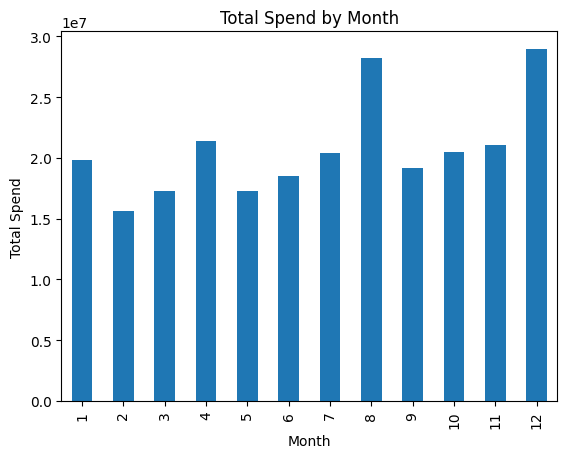

In [22]:
monthly_spend = df.groupby('Month')['Total_Spend'].sum()
monthly_spend.plot(kind='bar')

plt.title('Total Spend by Month')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.show()


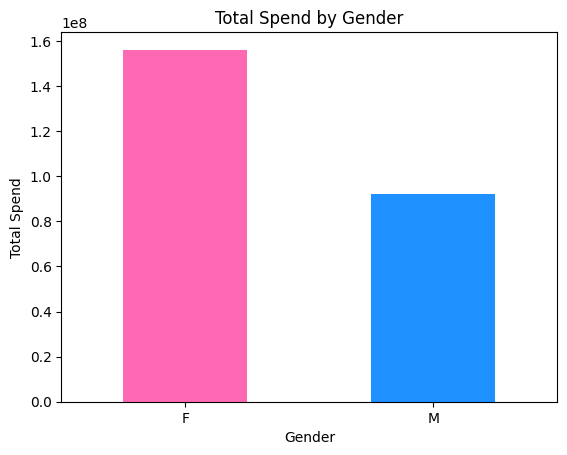

In [23]:
gender_spend = df.groupby('Gender')['Total_Spend'].sum()
gender_spend.plot(kind='bar', color=['#FF69B4', '#1E90FF']) 

plt.title('Total Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.xticks(rotation=0)
plt.show()


In [25]:
#Copy df to avoid messing with the original ( get dummies hater XD)
df_work = df.copy()

In [26]:
#Defining high spenders
df_work['High_Spend'] = (df_work['Total_Spend'] > 2000).astype(int)

In [27]:
le = LabelEncoder()
df_work['Gender_encoded'] = le.fit_transform(df_work['Gender'])


In [28]:

X = df_work[['Month', 'Tenure_Months', 'Gender_encoded']]
y = df_work['High_Spend']


In [29]:
# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [30]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred = clf.predict(X_test)

In [32]:
acc = accuracy_score(y_test, y_pred)

In [33]:
print("Accuracy for elite spenders:", acc)

Accuracy for elite spenders: 0.9547834364588291
